In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import autograd as ad
import autograd.numpy as np

# SNAIL potential

In [14]:
phi = np.linspace(-3*np.pi,3*np.pi,1000)
Ej = 90*2*np.pi
El = 64*2*np.pi
def U_s(phi): 
    beta = 0.2
    phi_ex = 0.4*2*np.pi
    return (-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))
# def U_sapp(phi): 
#     beta = 0.15
#     phi_ex = 0.4*2*np.pi
#     return (-3*np.cos((phi)/3)-beta*(1+1/2*(phi-phi_ex)**2+1/4/3/2*(phi-phi_ex)**4))

Text(0.5, 1.0, 'β = 0.15')

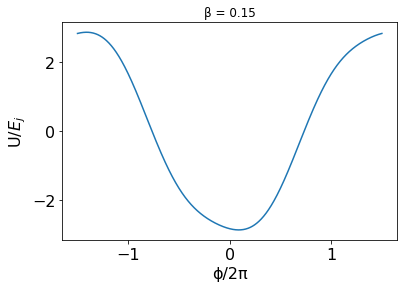

In [24]:
# plt.plot(phi,U_sapp(phi),label='app')
plt.plot(phi/2/np.pi,U_s(phi),label='exact')
plt.xlabel('ϕ/2π',fontsize=16)
plt.ylabel('U/$E_j$',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.title("β = 0.15")

# Calculate potential minimum

In [299]:
phi_min = sci.optimize.minimize(U_s,0).x

In [300]:
phi_min

array([0.30879911])

In [301]:
firstd = ad.grad(U_s)
secondd = ad.grad(firstd)
thirdd = ad.grad(secondd)
fourd = ad.grad(thirdd)
fived = ad.grad(fourd)
sixd = ad.grad(fived)
sevend = ad.grad(sixd)
eightd = ad.grad(sevend)

In [302]:
c2 = secondd(phi_min[0])
c3 = thirdd(phi_min[0])/3/2
c4 = fourd(phi_min[0])/4/3/2
c5 = fived(phi_min[0])/5/4/3/2
c6 = sixd(phi_min[0])/6/5/4/3/2
c7 = sevend(phi_min[0])/7/6/5/4/3/2
c8 = eightd(phi_min[0])/8/7/6/5/4/3/2

In [303]:
0.25092334291474816*p

0.18547607774037647

In [304]:
firstd(phi_min[0])
c2

0.8058348376266125

In [305]:
Ej = 90*2*np.pi
Ec = 0.177*2*np.pi
beta = 0.15
phi_ex = 0.4*2*np.pi
omega_s = np.sqrt(8*c2*Ej*Ec)
phi_zpf = np.power(2*Ec/Ej/c2,1/4)
g2 = Ej*phi_zpf**2*c2/2
g3 = Ej*phi_zpf**3*c3
g4 = Ej*phi_zpf**4*c4
g5 = Ej*phi_zpf**5*c5
g6 = Ej*phi_zpf**6*c6
g7 = Ej*phi_zpf**7*c7
g8 = 2*Ej*phi_zpf**8*c8

In [306]:
omega_s/2/np.pi

10.133883347815658

In [307]:
phi = np.linspace(-2*np.pi,2*np.pi,10000)
U_sapp = g2*(phi-phi_min)**2 + g3*(phi-phi_min)**3 + g4*(phi-phi_min)**4 + g5*(phi-phi_min)**5 + g6*(phi-phi_min)**6 + g7*(phi-phi_min)**7 + (g8)*(phi-phi_min)**8

(-5.0, 10.0)

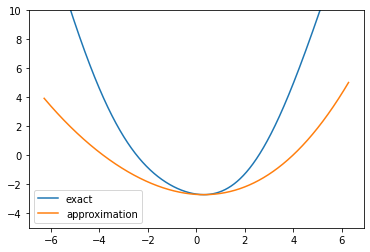

In [308]:
plt.plot(phi,U_s(phi), label = "exact")
plt.plot(phi,U_sapp/Ej*2*np.pi + np.min(U_s(phi))*np.ones(len(phi)), label = "approximation" )
plt.legend()
plt.ylim(-5,10)


In [309]:
def annihilation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),1)
def creation(dim):
    return np.diag(np.sqrt(np.arange(1,dim)),-1)

In [310]:
dim = 10
beta = 0.15
s = annihilation(dim)
sd = creation(dim)
H = omega_s * np.matmul(sd,s)
x2 = np.matmul(s+sd,s+sd)
x3 = np.matmul(s+sd,x2)
x4 = np.matmul(s+sd,x3)
x5 = np.matmul(s+sd,x4)
x6 = np.matmul(s+sd,x5)
x7 = np.matmul(s+sd,x6)
x8 = np.matmul(s+sd,x7)
H += g3*x3 + g4*x4 + g5*x5 + g6*x6 + g7*x7 + g8*x8
#cos(phi_ex(s+sd))

In [311]:
energy = np.linalg.eigh(H)[0]
energy = energy-energy[0]*np.ones(len(energy))
energy[1]/2/np.pi

10.136602948131612

In [312]:
(-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))

array([1.62135255, 1.62015313, 1.61895325, ..., 1.61939647, 1.62037474,
       1.62135255])

In [313]:
g2

15.918266738916806

In [314]:
H2 = (omega_s * np.matmul(sd,s)
- Ej*(beta*sci.linalg.cosm(phi_zpf*(s+sd)+(phi_min-phi_ex)*np.identity(dim))
+ 3*sci.linalg.cosm((phi_zpf*(s+sd)+phi_min*np.identity(dim))/3))- g2*x2)

In [315]:
energy = np.linalg.eigh(H2)[0]
energy = energy-energy[0]*np.ones(len(energy))
energy[1]/2/np.pi

5.633254732001965

# phi_min derivative

In [316]:
def phi_mind(phi_ex,dphi_ex):
    def U_s(phi,phi_ex): 
        beta = 0.147
        return (-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))
    phi_min1 = sci.optimize.minimize(U_s,0,args=(phi_ex)).x
    phi_ex2 = phi_ex + dphi_ex
    phi_min2 = sci.optimize.minimize(U_s,0,args = (phi_ex2)).x
    return (phi_min2-phi_min1)/dphi_ex, phi_min1

In [317]:
phi_mind(0.4*2*np.pi,1e-2)

(array([-0.31993247]), array([0.37215512]))

In [318]:
beta = 0.147
phi_min = 0.37217076

In [319]:
beta*np.cos(phi_min - phi_ex)/c2

-0.09848656614541582

# Energy fluctuation

In [320]:
def dws(phi_ex,dphi_ex):
    def U_s(phi,phi_ex): 
        beta = 0.147
        return (-beta*np.cos(phi-phi_ex)-3*np.cos((phi)/3))
    firstd = ad.grad(U_s)
    secondd = ad.grad(firstd)
    phi_min1 = sci.optimize.minimize(U_s,0,args=(phi_ex)).x
    phi_ex2 = phi_ex + dphi_ex
    phi_min2 = sci.optimize.minimize(U_s,0,args = (phi_ex2)).x
    c21 = secondd(phi_min1[0],phi_ex)
    c22 = secondd(phi_min2[0],phi_ex2)
    Ej = 90*2*np.pi
    Ec = 0.177*2*np.pi
    omega_c1 = np.sqrt(8*c21*Ej*Ec)
    omega_c2 = np.sqrt(8*c22*Ej*Ec)
    return (omega_c2-omega_c1)/dphi_ex, omega_c1

In [321]:
dws(0.4*2*np.pi,1e-5)

(-11.07948351304344, 35.564814488566746)

In [322]:
np.sqrt(8*Ec*Ej)/2/np.sqrt(c2)*-0.31567742

-12.471631010178406

In [326]:
np.sqrt(8*Ec*Ej)/2/np.pi

11.288932633336067

In [324]:
dc2=c3*6/c2*(beta*np.cos(phi_min-phi_ex)-9/8*c2)

In [325]:
dc2*np.sqrt(8*Ec*Ej)/2/np.sqrt(c2)

-15.029159963428821